In [1]:
import importlib
print('1')
import ESNClasses  # Import the module as an object
print('2')

importlib.reload(ESNClasses) #refresh
print('done')
from ESNClasses import *  #use the functions directly

1
2
done


**Load the data**

In [2]:
PAM1Path = 'data/PAM1_BifurcationData/PAM_timeseries_load_change.txt'
PAM1data = np.loadtxt(PAM1Path)

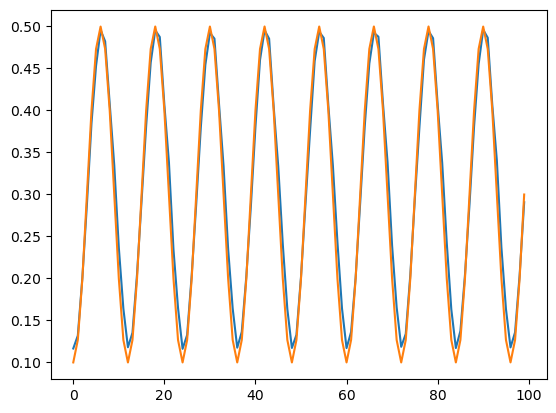

In [3]:
multiplexageResistance = [21]#3,9,21, 27] #15
multiplexagePressure = [7,13,25,31] #19
multiplexageLength = [4]#[4,10,22,28]#16
multiplexageLoadMeas = [6]#[6,12,24,30]#18
multiplexageMeasuredPressure = [23]#[5,11,23,29]#17
for load_val in range(150, 250, 5):
  for indexColumn in range(1):
    if(indexColumn>0):
        break

    start_index = int(((load_val - 100) / 5) * 2000)
    electricalResistance = PAM1data[start_index:(start_index + 2000), multiplexageResistance[indexColumn]] / 1e3
    pressure = PAM1data[start_index:(start_index + 2000), multiplexagePressure[indexColumn]]
    pressureMeas = PAM1data[start_index:(start_index + 2000), multiplexageMeasuredPressure[indexColumn]]
    length = PAM1data[start_index:(start_index + 2000), multiplexageLength[indexColumn]]
    load_meas = PAM1data[start_index:(start_index + 2000), multiplexageLoadMeas[indexColumn]]

    plt.plot(pressureMeas[:100])
    plt.plot(pressure[:100])
    plt.show()
  break


In [4]:
PAM2Path = 'data/PAM2_data/a_closedloop.txt'
PAM2data = np.loadtxt(PAM2Path)

In [5]:
# Dossier contenant vos .txt
base_dir = 'data/PAM3_RandomInputData'

# Dictionnaire pour stocker les données
data_dict = {}

# Chargement
for load in range(50, 251, 25):
    fname = f'PAM_step0.1_load{load}_20211224_edit.txt'
    path  = os.path.join(base_dir, fname)
    data = np.loadtxt(path)
    data_dict[load] = data


In [6]:
processed_data_dict = {}

for load, data in data_dict.items():
    n_rows, n_cols = data.shape
    assert n_cols == 32, f"Attendu 32 colonnes, trouvé {n_cols} pour load={load}"

    time_step = data[:, 0]
    rand_input = data[:, 1]
    mux_block = data[:, 2:].reshape(n_rows, 5, 6)

    grandeurs = ['R_meas', 'L_meas', 'P_meas', 'load_meas', 'P_ctrl', 'load_ctrl']
    multiplex_data = {}

    for m in range(5):
        mux_dict = {grandeurs[i]: mux_block[:, m, i] for i in range(6)}
        multiplex_data[f'mux_{m+1}'] = mux_dict

    processed_data_dict[load] = {
        'time_step': time_step,
        'rand_input': rand_input,
        'multiplex_data': multiplex_data
    }


In [7]:
def plot_variable(load, grandeur, timesteps = 100, mux='mux_1'):
    t = processed_data_dict[load]['time_step'][:timesteps]

    if grandeur == 'rand_input':
        y = processed_data_dict[load]['rand_input'][:timesteps]
    else:
        y = processed_data_dict[load]['multiplex_data'][mux][grandeur][:timesteps]

    plt.figure()
    plt.plot(t, y)
    plt.title(f'Load = {load}, {grandeur} ({mux if grandeur != "rand_input" else ""})')
    plt.xlabel('time_step')
    plt.ylabel(grandeur)
    plt.show()

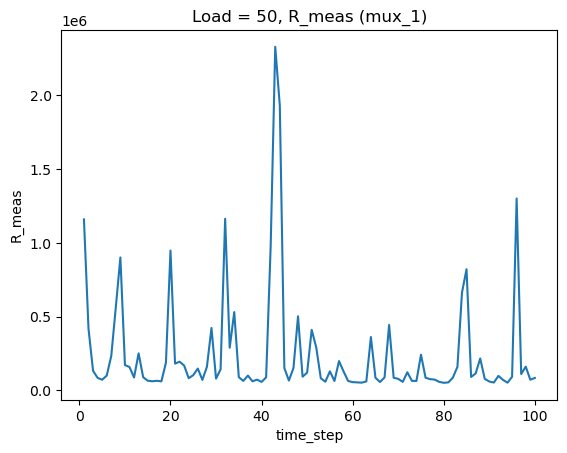

In [8]:
plot_variable(50, 'R_meas', 100,'mux_1')

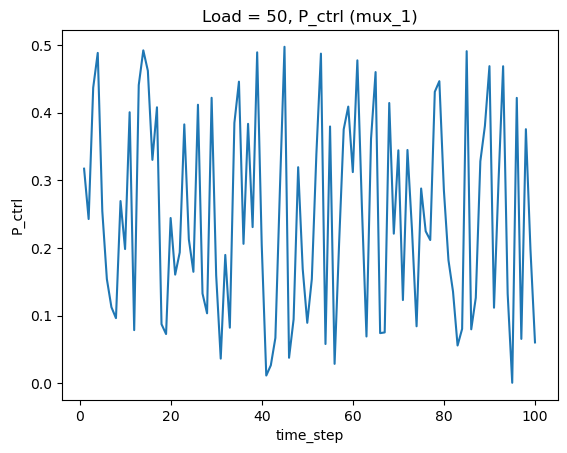

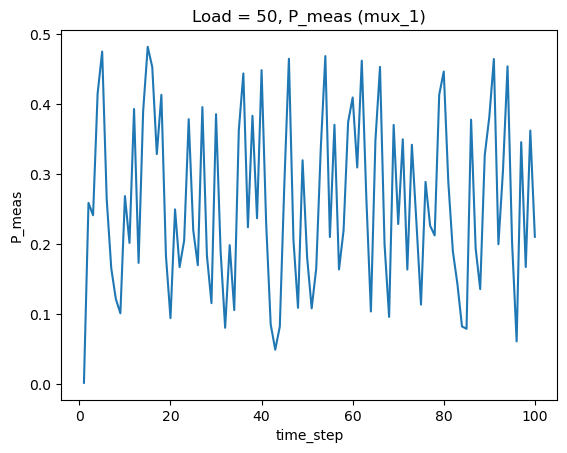

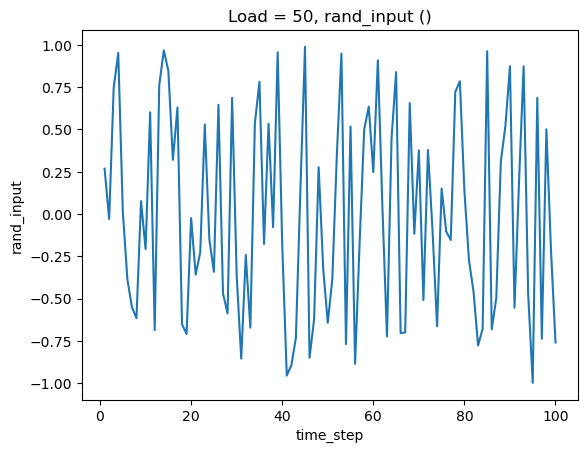

In [9]:
plot_variable(50, 'P_ctrl')
plot_variable(50,'P_meas')
plot_variable(50, 'rand_input')


In [10]:
lambdasVals =[1] # Regularization parameter
rhoVals = [0.95]  # Spectral radius
leakyVals = [1]  # Leaky rate
sparsityVals = [1]  # Matrix sparsity
dimESNvals = [1000]  # Size of the reservoir
sigma_output = 0.1  #Doesnt matter

winFactors = [1]
wnetFactors = [1]#1.4]


wpFactors = [0]


nbWashout = [20]
nbTrain = [80]

firstTrainingVals = [100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245]
#firstTrainingVals = [105,140,170,175,180,185,190,195,200,205,210,235,240,245]


betaValue = 0

inputScalings1 = [2.5]
reservoirScalings1 = [1]
biasScalings = [0.55]

inputScaling2 = 1
reservoirScaling2 = 1

washoutScaling = 0
theBiasesFactors = [1]
shrinkingFactors = [1]#0.4

dividersState = [1]

view100 = True
viewData = True

#General parameters
nbMeasures = 2000
deltaLoad = 5  # Newton
load_values = list(range(100, 255, deltaLoad))
num_points = 2000

t_predict = 200
heatTime = 25
t_predict = 200
heatTime = 25
shiftsTrain = [0]

deltaLoadRand = 25
nbMeasuresRand = 9999
deltaLoadSine = 5
nbMeasuresSine = 2000

load_values = list(range(100, 250, deltaLoad))
num_points = 2000

viewElec = False
viewLength = False
viewLoad = True
viewPressure = True

Lambda = 1
TheshrinkingFactor = 1
Leakage = 1
rand
rand
rand
rand
rand
rand
rand
rand
rand
rand
rand
rand
rand
rand
rand
sine
sine
sine
sine


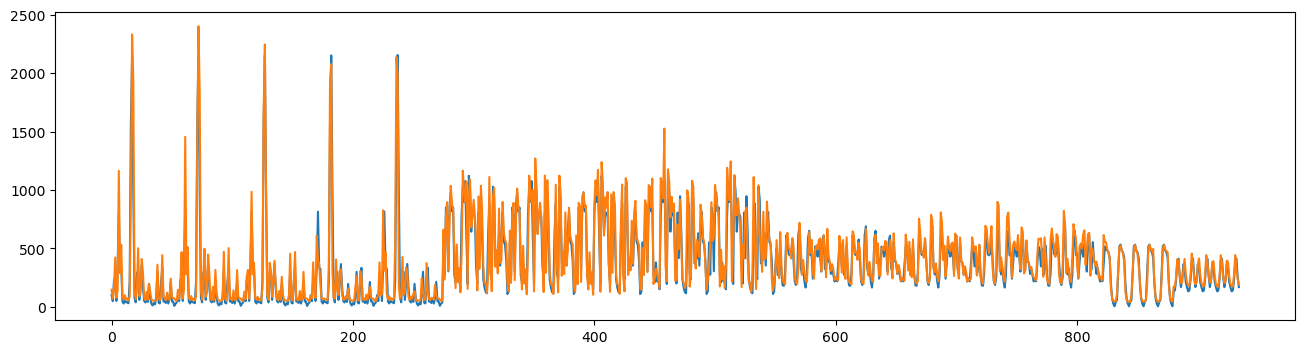

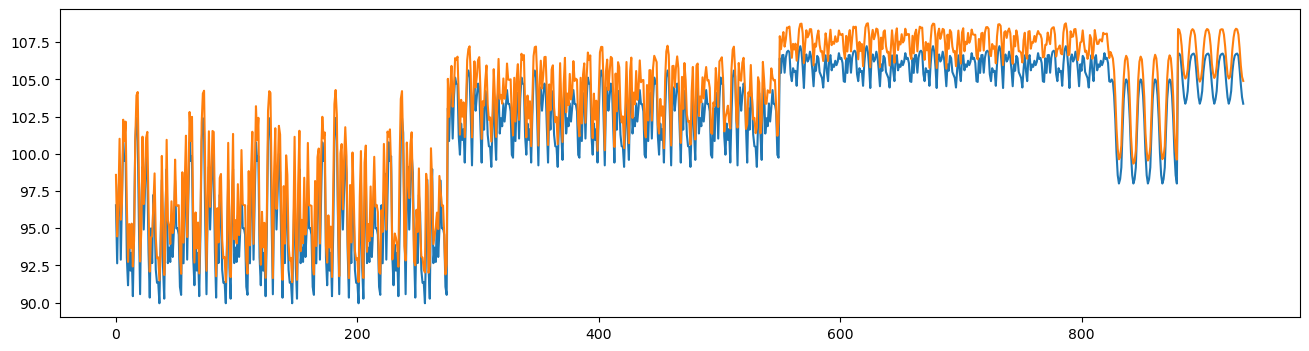

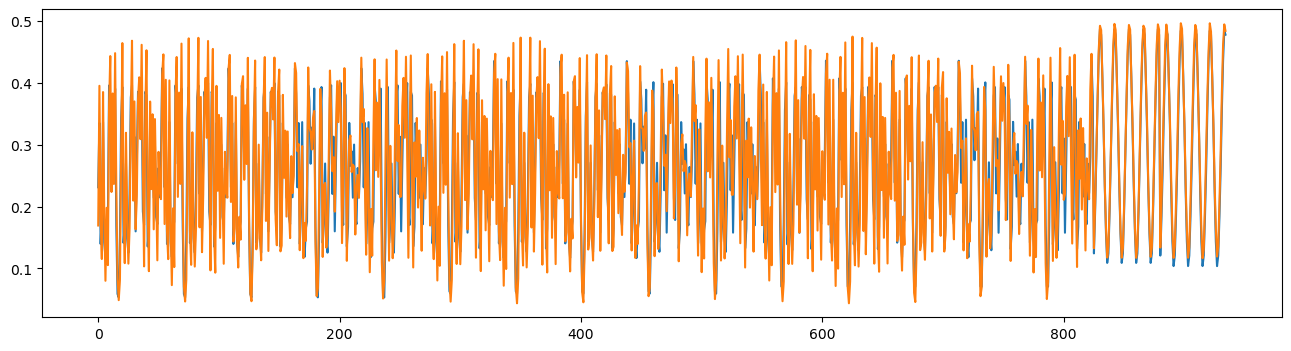

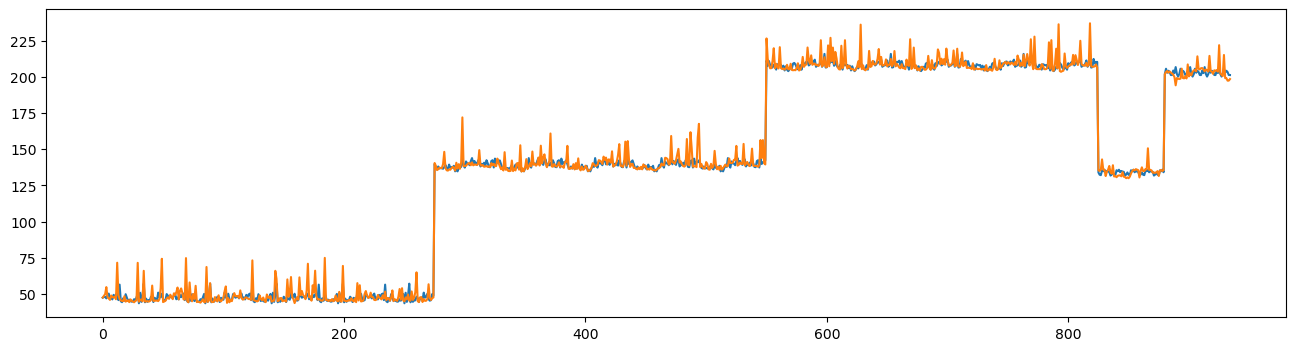

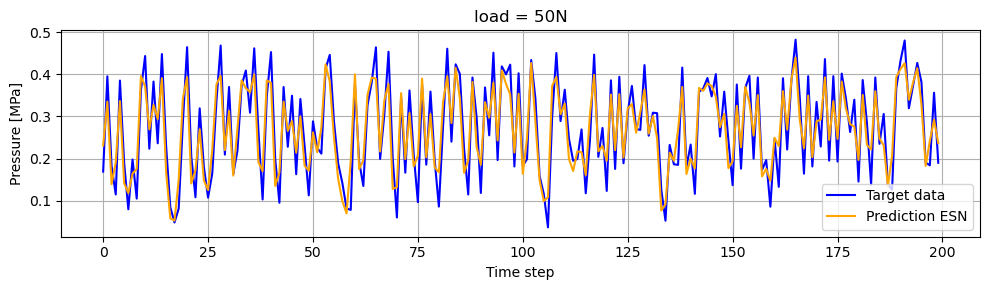

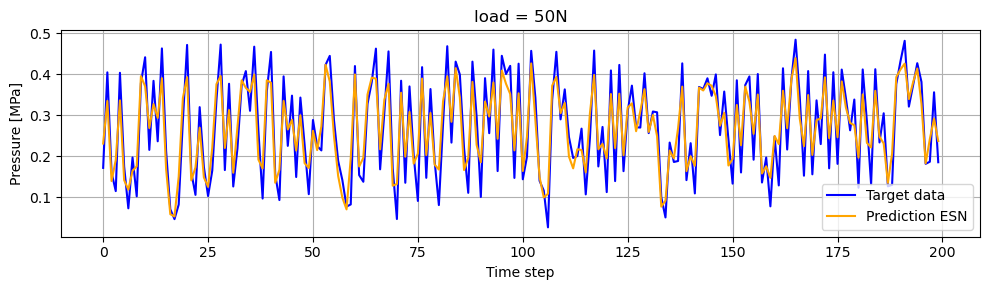

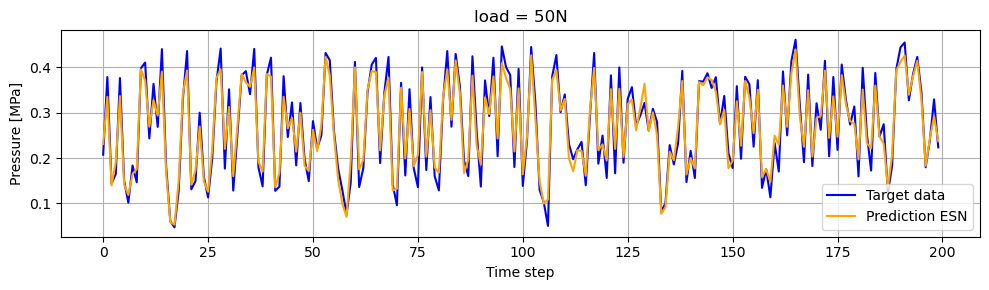

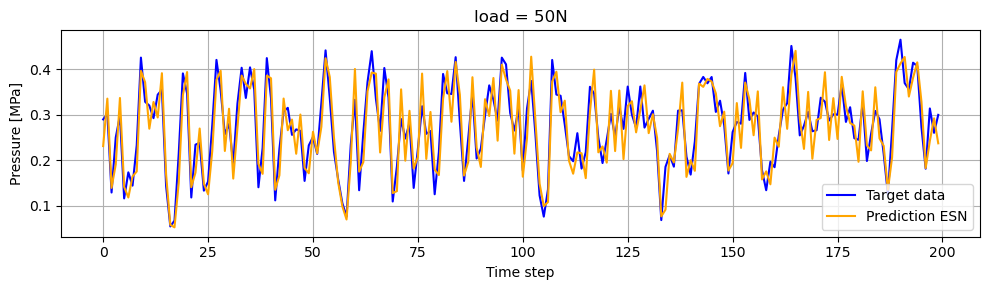

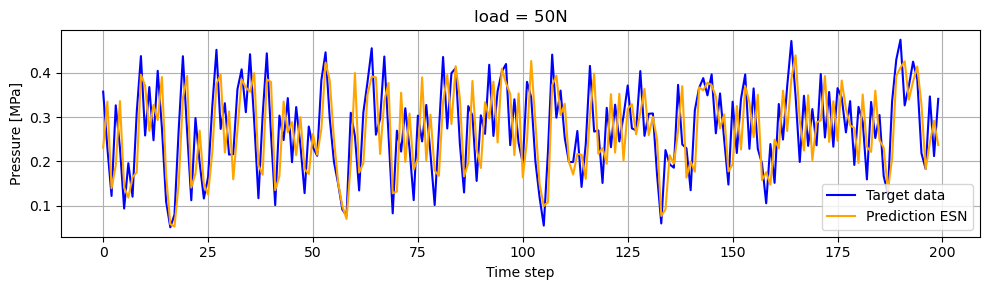

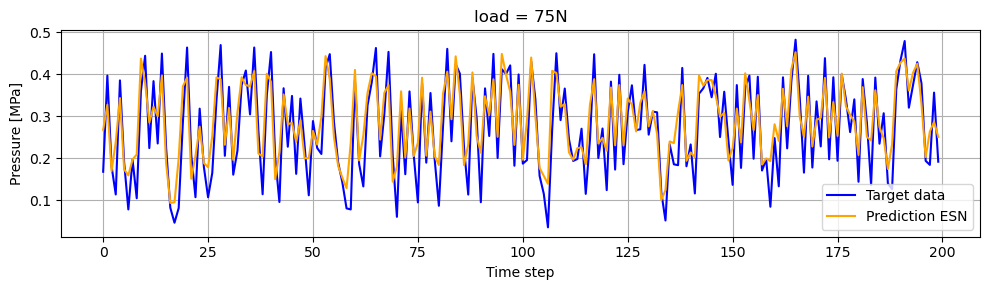

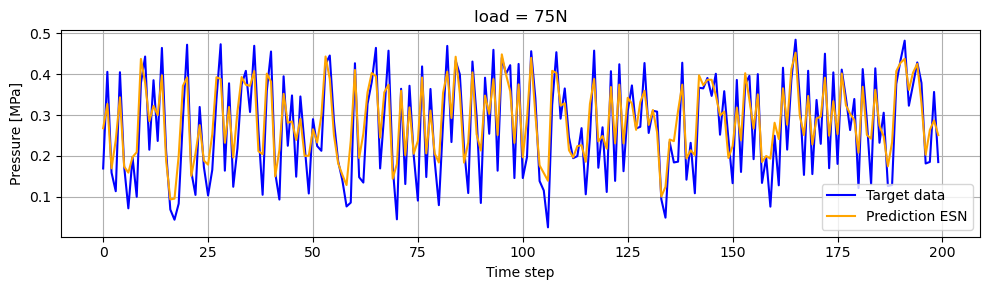

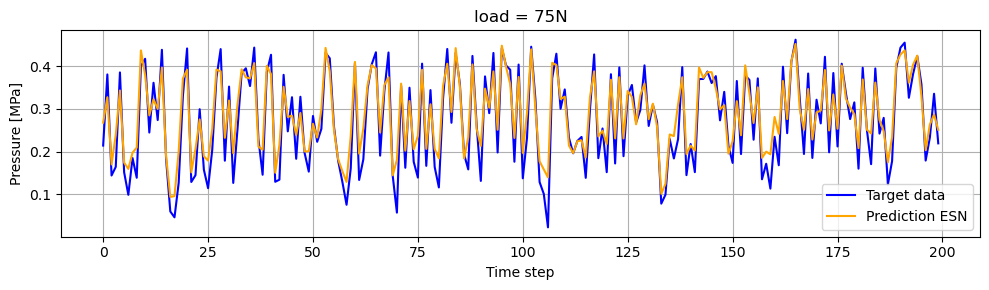

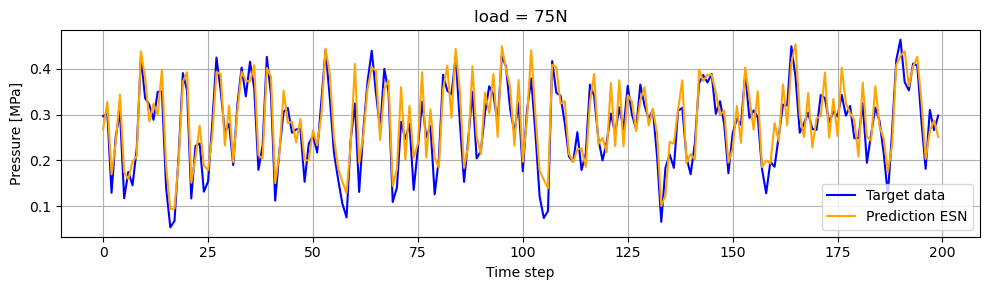

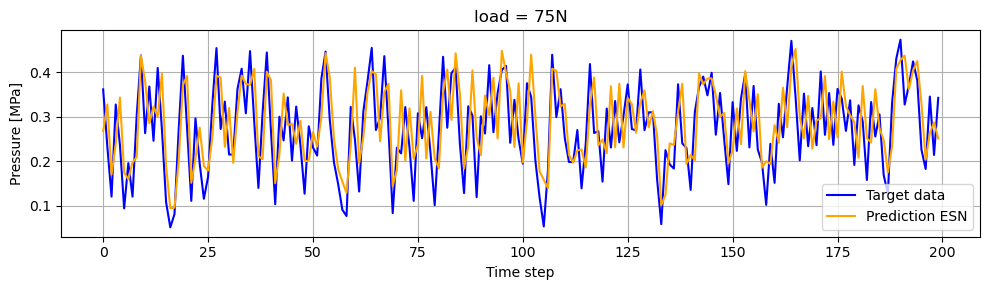

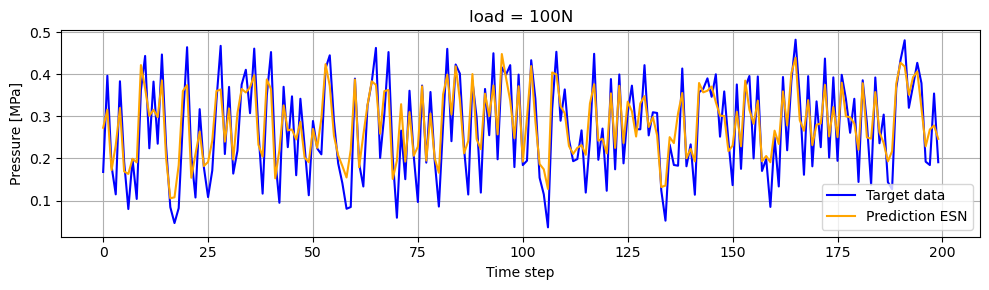

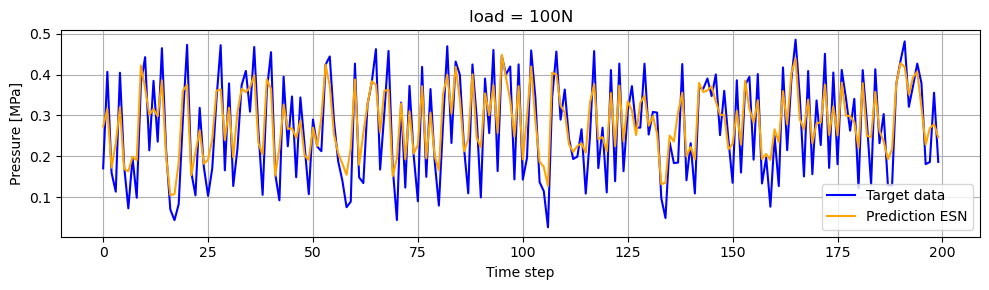

KeyboardInterrupt: 

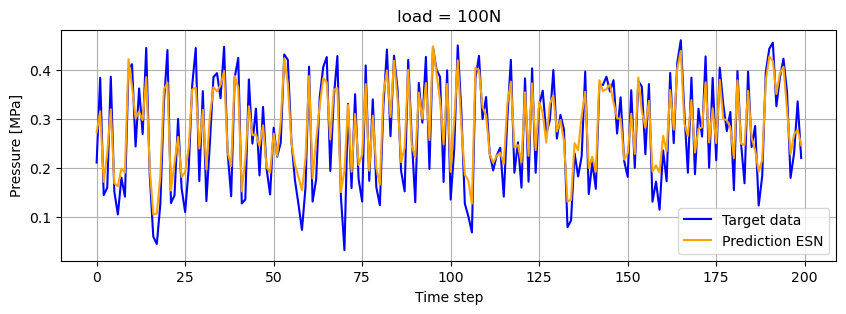

In [11]:
#Boucles sur les hyperparamètres
results = {}
for param_lambda in lambdasVals:
    print("Lambda =", param_lambda)
    for theDivideState in dividersState:
        for rho in rhoVals:
            for matrix_sparsity in sparsityVals:
                for theshrinkingFactor in shrinkingFactors:
                    print("TheshrinkingFactor =", theshrinkingFactor)
                    for inputScaling1 in inputScalings1:
                        for reservoirScaling1 in reservoirScalings1:
                            for biasScaling in biasScalings:
                                for wnetVal in wnetFactors:
                                    for leaky_val in leakyVals:
                                        print("Leakage =", leaky_val)
                                    # for firstTrainingVal in firstTrainingVals:
                                       # print("first load train : ", firstTrainingVal)
                                        for winVal in winFactors:
                                            for dim_esn in dimESNvals:
                                                #  print("dimESN2 : ", dim_esn)
                                                for theBiasesFactor in theBiasesFactors:
                                                    for t_train in nbTrain:
                                                        # print("t_train : ", t_train)
                                                        for t_washout in nbWashout:
                                                            for shiftTrain in shiftsTrain :
                                                                dictBifurcationValues = {}
                                                                dictBifurcationValues2 = {}

                                                                # Définition des bornes et dimensions
                                                                loadValMin = 50#100
                                                                loadValMax = 250#250

                                                                # ESN2 : transforme la prédiction normalisée de ESN1 en valeur brute.
                                                                # On choisit ici 2 entrées : [ESN1_prediction, load (brute)]
                                                                dim_in_ESN2 = 2
                                                                dim_out_ESN2 = 4

                                                                # Initialisation du générateur et conditions initiales
                                                                rnd = np.random.default_rng(1234)
                                                                reservoirScaling = 0
                                                                ###### Initialisation de l'ESN2 ######
                                                                x_init = rnd.uniform(low=-0, high=0, size=(dim_esn,))

                                                                w_inDilatation = Linear(dim_in_ESN2, dim_esn, bound=inputScaling1,
                                                                                        LowboundBias=-inputScaling1, HighboundBias=inputScaling1, rnd=rnd)
                                                                netDilatation = ESN(
                                                                    dim=dim_esn,
                                                                    sr=rho,
                                                                    a=leaky_val,
                                                                    f=np.tanh,
                                                                    p=matrix_sparsity,
                                                                    init_state=x_init,
                                                                    rnd=rnd,
                                                                    normalize=True,
                                                                    wpFactor=0,
                                                                    wnetFactor=wnetVal,
                                                                    knet=reservoirScaling1,
                                                                    kbias = biasScaling,
                                                                    theBiasFactor = theBiasesFactor,
                                                                    shrinkingFactor = theshrinkingFactor,
                                                                    divideStates = theDivideState
                                                                )
                                                                w_outDilation = RidgeReadout(dim_esn, dim_out_ESN2, bound=sigma_output,
                                                                                            LowboundBias=-1, HighboundBias=1,
                                                                                            lmbd=param_lambda, rnd=rnd)


                                                                loadTraining = [(50,'rand'),(150,'rand'),(225,'rand'), (150,'sine'), (225,'sine')]

                                                                t_total = t_washout + t_train

                                                                ######################################################################
                                                                # Phase d'entraînement de l'ESN2 (open-loop) :
                                                                # On fait passer les données d'entraînement dans ESN1 pour obtenir
                                                                # la prédiction normalisée, puis ESN2 apprend à transformer cette
                                                                # prédiction en valeur brute.
                                                                ######################################################################
                                                                x_train_ESN2 = []
                                                                y_train_ESN2 = []

                                                                numberOfMultiplexage = 5

                                                                for load_val, type in loadTraining:
                                                                  for indexColumn in range(numberOfMultiplexage):
                                                                    print(type)


                                                                    if (type == "rand"):
                                                                        start_index = int(((load_val - 50) / deltaLoadRand) * nbMeasuresRand)
                                                                        # Extraction of the  séries brutes
                                                                        electricalResistance = processed_data_dict[load_val]['multiplex_data'][f'mux_{indexColumn+1}']['R_meas'] / 1e3
                                                                        pressure = processed_data_dict[load_val]['multiplex_data'][f'mux_{indexColumn+1}']['P_ctrl']
                                                                        pressureMeas = processed_data_dict[load_val]['multiplex_data'][f'mux_{indexColumn+1}']['P_meas']
                                                                        length = processed_data_dict[load_val]['multiplex_data'][f'mux_{indexColumn+1}']['L_meas']
                                                                        load_meas = processed_data_dict[load_val]['multiplex_data'][f'mux_{indexColumn+1}']['load_meas']

                                                                      #  loadVal = controlLoadTimeSeries[start_index : start_index+t_total]
                                                                       # length = lengthTimeSeries[start_index : start_index+t_total]

                                                                    else: #its a sine
                                                                        if(indexColumn>0):
                                                                            break
                                                                        multiplexageResistance = [21]#3,9,21, 27] #15
                                                                        multiplexagePressure = [7,13,25,31] #19
                                                                        multiplexageLength = [22]#[4,10,22,28]#16
                                                                        multiplexageLoadMeas = [24]#[6,12,24,30]#18
                                                                        multiplexageMeasuredPressure = [23]#[5,11,23,29]#17

                                                                        start_index = int(((load_val - 100) / deltaLoadSine) * nbMeasuresSine)
                                                                        electricalResistance = PAM1data[start_index:(start_index + nbMeasures), multiplexageResistance[indexColumn]] / 1e3
                                                                        pressure = PAM1data[start_index:(start_index + nbMeasures), multiplexagePressure[indexColumn]]
                                                                        pressureMeas = PAM1data[start_index:(start_index + nbMeasures), multiplexageMeasuredPressure[indexColumn]]
                                                                        length = PAM1data[start_index:(start_index + nbMeasures), multiplexageLength[indexColumn]]
                                                                        load_meas = PAM1data[start_index:(start_index + nbMeasures), multiplexageLoadMeas[indexColumn]]


                                                                    # Normalization for the ESN
                                                                    electricalResistanceNormalized = (electricalResistance-np.min(electricalResistance))/(np.max(electricalResistance)-np.min(electricalResistance))
                                                                    pressureNormalized = (pressure-np.min(pressure))/(np.max(pressure)-np.min(pressure))
                                                                    pressureMeasNormalized = (pressureMeas-np.min(pressureMeas))/(np.max(pressureMeas)-np.min(pressureMeas))
                                                                    lengthNormalized = (length-np.min(length))/(np.max(length)-np.min(length))

                                                                    load_valNormalized = (load_val - loadValMin) / (loadValMax - loadValMin)

                                                                    y_norm_pred = rnd.uniform(0, 1)

                                                                    for t in range(t_washout):
                                                                      inputWashout = np.random.uniform(-washoutScaling, washoutScaling, size=dim_in_ESN2)
                                                                      inputReservoir = w_inDilatation(inputWashout, beta=0, winFactor=winVal)
                                                                      netDilatation.step(inputReservoir, p =0)

                                                                    for t in range(shiftTrain, shiftTrain+t_train):
                                                                      t_actual = t
                                                                      current_input_ESN2 = [pressureNormalized[t_actual],
                                                                                            load_valNormalized]

                                                                      inputReservoir = w_inDilatation(current_input_ESN2, beta=betaValue, winFactor=winVal)
                                                                      netDilatation.step(inputReservoir, p=0)

                                                                      if t_actual>=heatTime: #Phase de "chauffe" des états du réservoir
                                                                        x_train_ESN2.append(np.copy(netDilatation.x)) #reservoir states
                                                                        y_train_ESN2.append([electricalResistance[t_actual], length[t_actual], pressureMeas[t_actual], load_meas[t_actual]])

                                                                x_train_ESN2 = np.array(x_train_ESN2)
                                                                y_train_ESN2 = np.array(y_train_ESN2)

                                                                w_outDilation.train(x_train_ESN2, y_train_ESN2)

                                                                plt.figure(figsize=(16, 4))
                                                                plt.plot(w_outDilation(x_train_ESN2)[:,0])
                                                                plt.plot(y_train_ESN2[:,0])
                                                                plt.show()

                                                                plt.figure(figsize=(16, 4))
                                                                plt.plot(w_outDilation(x_train_ESN2)[:,1])
                                                                plt.plot(y_train_ESN2[:,1])
                                                                plt.show()

                                                                plt.figure(figsize=(16, 4))
                                                                plt.plot(w_outDilation(x_train_ESN2)[:,2])
                                                                plt.plot(y_train_ESN2[:,2])
                                                                plt.show()

                                                                plt.figure(figsize=(16, 4))
                                                                plt.plot(w_outDilation(x_train_ESN2)[:,3])
                                                                plt.plot(y_train_ESN2[:,3])
                                                                plt.show()

                                                                #############################################################
                                                                # Phase de prédiction en chaîne (close-loop) pour les 2 ESN #
                                                                #############################################################
                                                                bifurcation_data_prediction = []
                                                                all_rmse_per_load = []

                                                                for load_val in range(50, 251, 25):
                                                                  for indexColumn in range(numberOfMultiplexage):

                                                                    start_index = int(((load_val - 50) / deltaLoadRand) * nbMeasuresRand)
                                                                    # Extraction of the  séries brutes
                                                                    electricalResistance = processed_data_dict[load_val]['multiplex_data'][f'mux_{indexColumn+1}']['R_meas'] / 1e3
                                                                    pressure = processed_data_dict[load_val]['multiplex_data'][f'mux_{indexColumn+1}']['P_ctrl']
                                                                    pressureMeas = processed_data_dict[load_val]['multiplex_data'][f'mux_{indexColumn+1}']['P_meas']
                                                                    length = processed_data_dict[load_val]['multiplex_data'][f'mux_{indexColumn+1}']['L_meas']
                                                                    load_meas = processed_data_dict[load_val]['multiplex_data'][f'mux_{indexColumn+1}']['load_meas']

                                                                    # Normalization for ESN
                                                                    electricalResistanceNormalized = (electricalResistance-np.min(electricalResistance))/(np.max(electricalResistance)-np.min(electricalResistance))
                                                                    pressureNormalized = (pressure-np.min(pressure))/(np.max(pressure)-np.min(pressure))

                                                                    pressureMeasNormalized = (pressureMeas-np.min(pressureMeas))/(np.max(pressureMeas)-np.min(pressureMeas))
                                                                    lengthNormalized = (length-np.min(length))/(np.max(length)-np.min(length))

                                                                    load_valNormalized = (load_val - loadValMin) / (loadValMax - loadValMin)


                                                                    # Predictions ESN

                                                                    y_pred_elec = np.zeros(t_predict)
                                                                    y_pred_length = np.zeros(t_predict)
                                                                    y_pred_pressure = np.zeros(t_predict)
                                                                    y_pred_load = np.zeros(t_predict)

                                                                    oneReservoir2StateValue = []
                                                                    cpt = 0


                                                                    for t in range(t_washout):
                                                                        inputWashout = np.random.uniform(-washoutScaling, washoutScaling, size=dim_in_ESN2)
                                                                        netDilatation.step(w_inDilatation(inputWashout, beta=0, winFactor=winVal), p =0)
                                                                        oneReservoir2StateValue.append(netDilatation.x[80:90].copy())


                                                                    for t in range(heatTime+t_predict):
                                                                        t_actual = t

                                                                        if t_actual <50: #get extra reservoir states after washout
                                                                          oneReservoir2StateValue.append(netDilatation.x[80:90].copy())

                                                                        current_input_ESN2 = [pressureNormalized[t_actual],
                                                                                              load_valNormalized]

                                                                        in_2 = w_inDilatation(current_input_ESN2, beta=betaValue, winFactor=winVal)
                                                                        netDilatation.step(in_2, p=0)

                                                                        y_out2 = w_outDilation(np.copy(netDilatation.x))[0][0]
                                                                        y_out1 = w_outDilation(np.copy(netDilatation.x))[0][1]
                                                                        y_out3 = w_outDilation(np.copy(netDilatation.x))[0][2]
                                                                        y_out4 = w_outDilation(np.copy(netDilatation.x))[0][3]



                                                                        if t_actual >=heatTime: #"Heat" phase for the reservoir states
                                                                          y_pred_elec[t_actual-heatTime] = y_out2
                                                                          y_pred_length[t_actual-heatTime] = y_out1
                                                                          y_pred_pressure[t_actual-heatTime] = y_out3
                                                                          y_pred_load[t_actual-heatTime] = y_out4

                                                                    y_target_elec = electricalResistance[heatTime:heatTime+t_predict]
                                                                    y_target_length = length[heatTime:heatTime+t_predict]
                                                                    y_target_pressure = pressureMeas[heatTime:heatTime+t_predict]
                                                                    y_target_load = load_meas[heatTime:heatTime+t_predict]


                                                                    title_str = (f"load = {load_val}, λ={param_lambda}, ρ={rho}, p={matrix_sparsity}\n"
                                                                                 f"a={leaky_val}, β={betaValue}\n"
                                                                                 f"wnet={wnetVal}, win={winVal}\n"
                                                                                 f"dim_esn={dim_esn}, t_train={t_train}, t_washout={t_washout}")

                                                                    if (viewElec):

                                                                        fig, ax = plt.subplots(figsize=(10, 3))

                                                                        # tracé de la série Target
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_target_elec,
                                                                            label='Target data',
                                                                            color='blue'
                                                                        )

                                                                        # tracé de la prédiction ESN
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_pred_elec,
                                                                            label='Prediction ESN',
                                                                            color='orange'
                                                                        )

                                                                        # étiquettes et grille
                                                                        ax.set_xlabel('Time step')
                                                                        ax.set_ylabel('Resistance [kΩ]')
                                                                        ax.set_title(f"load = {load_val}N")
                                                                        ax.legend()
                                                                        ax.grid(True)

                                                                        # disposition compacte
                                                                        plt.tight_layout()
                                                                        plt.show()

                                                                    elif(viewLength):
                                                                        fig, ax = plt.subplots(figsize=(10, 3))

                                                                        # tracé de la série Target
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_target_length,
                                                                            label='Target data',
                                                                            color='blue'
                                                                        )

                                                                        # tracé de la prédiction ESN
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_pred_length,
                                                                            label='Prediction ESN',
                                                                            color='orange'
                                                                        )

                                                                        # étiquettes et grille
                                                                        ax.set_xlabel('Time step')
                                                                        ax.set_ylabel('Resistance [kΩ]')
                                                                        ax.set_title(f"load = {load_val}N")
                                                                        ax.legend()
                                                                        ax.grid(True)

                                                                        # disposition compacte
                                                                        plt.tight_layout()
                                                                        plt.show()

                                                                    elif(viewPressure):
                                                                        fig, ax = plt.subplots(figsize=(10, 3))

                                                                        # tracé de la série Target
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_target_pressure,
                                                                            label='Target data',
                                                                            color='blue'
                                                                        )

                                                                        # tracé de la prédiction ESN
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_pred_pressure,
                                                                            label='Prediction ESN',
                                                                            color='orange'
                                                                        )

                                                                        # étiquettes et grille
                                                                        ax.set_xlabel('Time step')
                                                                        ax.set_ylabel('Pressure [MPa]')
                                                                        ax.set_title(f"load = {load_val}N")
                                                                        ax.legend()
                                                                        ax.grid(True)

                                                                        # disposition compacte
                                                                        plt.tight_layout()
                                                                        plt.show()
                                                                    elif(viewLoad):
                                                                        fig, ax = plt.subplots(figsize=(10, 3))

                                                                        # tracé de la série Target
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_target_load,
                                                                            label='Target data',
                                                                            color='blue'
                                                                        )

                                                                        # tracé de la prédiction ESN
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_pred_load,
                                                                            label='Prediction ESN',
                                                                            color='orange'
                                                                        )

                                                                        # étiquettes et grille
                                                                        ax.set_xlabel('Time step')
                                                                        ax.set_ylabel('Load [N]')
                                                                        ax.set_title(f"load = {load_val}N")
                                                                        ax.legend()
                                                                        ax.grid(True)

                                                                        # disposition compacte
                                                                        plt.tight_layout()
                                                                        plt.show()


                                                                    # si la condition n'est pas remplie, on ne trace rien et on continue la boucle




                                                                # Conversion des listes d'états en tableaux numpy (dimensions : n_steps x 10)
                                                                oneReservoir2StateArray = np.array(oneReservoir2StateValue)


                                                                # Tracé des états du réservoir ESN2 : un plot par nœud
                                                                num_nodes = oneReservoir2StateArray.shape[1]  # ici 10
                                                                rows = 2
                                                                cols = 5
                                                                fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
                                                                axs = axs.flatten()
                                                                for i in range(num_nodes):
                                                                    axs[i].plot(oneReservoir2StateArray[:, i], color='orange')
                                                                    axs[i].set_title(f'Reservoir state {i+1}')
                                                                    axs[i].set_xlabel("Time step")
                                                                    axs[i].set_ylabel("Value")
                                                                    axs[i].grid(True)

                                                                plt.tight_layout()
                                                                plt.show()

                                                                print(title_str)

                                                                #SECOND TEST DATAS FOR SINE INPUT
                                                                dictBifurcationValues = {}

                                                                bifurcation_data_prediction = []
                                                                all_rmse_per_load = []

                                                                for load_val in range(100, 250, 5):
                                                                  for indexColumn in range(numberOfMultiplexage):
                                                                    if(indexColumn>0):
                                                                        break

                                                                    start_index = int(((load_val - 100) / deltaLoadSine) * nbMeasuresSine)
                                                                    electricalResistance = PAM1data[start_index:(start_index + nbMeasures), multiplexageResistance[indexColumn]] / 1e3
                                                                    pressure = PAM1data[start_index:(start_index + nbMeasures), multiplexagePressure[indexColumn]]
                                                                    pressureMeas = PAM1data[start_index:(start_index + nbMeasures), multiplexageMeasuredPressure[indexColumn]]
                                                                    length = PAM1data[start_index:(start_index + nbMeasures), multiplexageLength[indexColumn]]
                                                                    load_meas = PAM1data[start_index:(start_index + nbMeasures), multiplexageLoadMeas[indexColumn]]


                                                                    # Normalization for ESN
                                                                    electricalResistanceNormalized = (electricalResistance-np.min(electricalResistance))/(np.max(electricalResistance)-np.min(electricalResistance))
                                                                    pressureNormalized = (pressure-np.min(pressure))/(np.max(pressure)-np.min(pressure))
                                                                    pressureMeasNormalized = (pressureMeas-np.min(pressureMeas))/(np.max(pressureMeas)-np.min(pressureMeas))
                                                                    lengthNormalized = (length-np.min(length))/(np.max(length)-np.min(length))

                                                                    load_valNormalized = (load_val - loadValMin) / (loadValMax - loadValMin)


                                                                    # Predictions ESN

                                                                    y_pred_elec = np.zeros(t_predict)
                                                                    y_pred_length = np.zeros(t_predict)
                                                                    y_pred_pressure = np.zeros(t_predict)
                                                                    y_pred_load = np.zeros(t_predict)

                                                                    oneReservoir2StateValue = []
                                                                    cpt = 0


                                                                    for t in range(t_washout):
                                                                        inputWashout = np.random.uniform(-washoutScaling, washoutScaling, size=dim_in_ESN2)
                                                                        netDilatation.step(w_inDilatation(inputWashout, beta=0, winFactor=winVal), p =0)
                                                                        oneReservoir2StateValue.append(netDilatation.x[80:90].copy())


                                                                    for t in range(heatTime+t_predict):
                                                                        t_actual = t

                                                                        if t_actual <50: #get extra reservoir states after washout
                                                                          oneReservoir2StateValue.append(netDilatation.x[80:90].copy())

                                                                        current_input_ESN2 = [pressureNormalized[t_actual],
                                                                                              load_valNormalized]

                                                                        in_2 = w_inDilatation(current_input_ESN2, beta=betaValue, winFactor=winVal)
                                                                        netDilatation.step(in_2, p=0)

                                                                        y_out2 = w_outDilation(np.copy(netDilatation.x))[0][0]
                                                                        y_out1 = w_outDilation(np.copy(netDilatation.x))[0][1]
                                                                        y_out3 = w_outDilation(np.copy(netDilatation.x))[0][2]
                                                                        y_out4 = w_outDilation(np.copy(netDilatation.x))[0][3]



                                                                        if t_actual >=heatTime: #"Heat" phase for the reservoir states
                                                                          y_pred_elec[t_actual-heatTime] = y_out2
                                                                          y_pred_length[t_actual-heatTime] = y_out1
                                                                          y_pred_pressure[t_actual-heatTime] = y_out3
                                                                          y_pred_load[t_actual-heatTime] = y_out4

                                                                    y_target_elec = electricalResistance[heatTime:heatTime+t_predict]
                                                                    y_target_length = length[heatTime:heatTime+t_predict]
                                                                    y_target_pressure = pressureMeas[heatTime:heatTime+t_predict]
                                                                    y_target_load = load_meas[heatTime:heatTime+t_predict]


                                                                    dictBifurcationValues = createMyBifurcationDiagram(y_pred_elec, dictBifurcationValues, load_val)

                                                                    title_str = (f"load = {load_val}, λ={param_lambda}, ρ={rho}, p={matrix_sparsity}\n"
                                                                                 f"a={leaky_val}, β={betaValue}\n"
                                                                                 f"wnet={wnetVal}, win={winVal}\n"
                                                                                 f"dim_esn={dim_esn}, t_train={t_train}, t_washout={t_washout}")


                                                                     # --- Bloc corrigé pour tracer une seule figure fixe par load_val ---
                                                                    if (viewElec):
                                                                        fig, ax = plt.subplots(figsize=(10, 3))

                                                                        # tracé de la série Target
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_target_elec,
                                                                            label='Target data',
                                                                            color='blue'
                                                                        )

                                                                        # tracé de la prédiction ESN
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_pred_elec,
                                                                            label='Prediction ESN',
                                                                            color='orange'
                                                                        )

                                                                        # étiquettes et grille
                                                                        ax.set_xlabel('Time step')
                                                                        ax.set_ylabel('Resistance [kΩ]')
                                                                        ax.set_title(f"load = {load_val}N")
                                                                        ax.legend()
                                                                        ax.grid(True)

                                                                        # disposition compacte
                                                                        plt.tight_layout()
                                                                        plt.show()
                                                                    elif(viewLength):
                                                                        fig, ax = plt.subplots(figsize=(10, 3))

                                                                        # tracé de la série Target
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_target_length,
                                                                            label='Target data',
                                                                            color='blue'
                                                                        )

                                                                        # tracé de la prédiction ESN
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_pred_length,
                                                                            label='Prediction ESN',
                                                                            color='orange'
                                                                        )

                                                                        # étiquettes et grille
                                                                        ax.set_xlabel('Time step')
                                                                        ax.set_ylabel('Length [mm]')
                                                                        ax.set_title(f"load = {load_val}N")
                                                                        ax.legend()
                                                                        ax.grid(True)

                                                                        # disposition compacte
                                                                        plt.tight_layout()
                                                                        plt.show()

                                                                    elif(viewPressure):
                                                                        fig, ax = plt.subplots(figsize=(10, 3))

                                                                        # tracé de la série Target
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_target_pressure,
                                                                            label='Target data',
                                                                            color='blue'
                                                                        )

                                                                        # tracé de la prédiction ESN
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_pred_pressure,
                                                                            label='Prediction ESN',
                                                                            color='orange'
                                                                        )

                                                                        # étiquettes et grille
                                                                        ax.set_xlabel('Time step')
                                                                        ax.set_ylabel('Pressure [MPa]')
                                                                        ax.set_title(f"load = {load_val}N")
                                                                        ax.legend()
                                                                        ax.grid(True)

                                                                        # disposition compacte
                                                                        plt.tight_layout()
                                                                        plt.show()

                                                                    elif(viewLoad):
                                                                        fig, ax = plt.subplots(figsize=(10, 3))

                                                                        # tracé de la série Target
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_target_load,
                                                                            label='Target data',
                                                                            color='blue'
                                                                        )

                                                                        # tracé de la prédiction ESN
                                                                        ax.plot(
                                                                            range(t_predict),
                                                                            y_pred_load,
                                                                            label='Prediction ESN',
                                                                            color='orange'
                                                                        )

                                                                        # étiquettes et grille
                                                                        ax.set_xlabel('Time step')
                                                                        ax.set_ylabel('Load [N]')
                                                                        ax.set_title(f"load = {load_val}N")
                                                                        ax.legend()
                                                                        ax.grid(True)

                                                                        # disposition compacte
                                                                        plt.tight_layout()
                                                                        plt.show()
                                                                    # si la condition n'est pas remplie, on ne trace rien et on continue la boucle




                                                                # Conversion des listes d'états en tableaux numpy (dimensions : n_steps x 10)
                                                                oneReservoir2StateArray = np.array(oneReservoir2StateValue)


                                                                # Tracé des états du réservoir ESN2 : un plot par nœud
                                                                num_nodes = oneReservoir2StateArray.shape[1]  # ici 10
                                                                rows = 2
                                                                cols = 5
                                                                fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
                                                                axs = axs.flatten()
                                                                for i in range(num_nodes):
                                                                    axs[i].plot(oneReservoir2StateArray[:, i], color='orange')
                                                                    axs[i].set_title(f'Reservoir state {i+1}')
                                                                    axs[i].set_xlabel("Time step")
                                                                    axs[i].set_ylabel("Value")
                                                                    axs[i].grid(True)

                                                                plt.tight_layout()
                                                                plt.show()

                                                                print(title_str)


                                                                fig, ax = plt.subplots(figsize=(10, 6))


                                                                plotBifurcation(dictBifurcationValues, ax = ax)

                                                                multiplexage_columns = multiplexageResistance

                                                                colors = ['red']* len(multiplexage_columns)
                                                                labels = ['Target']#Multiplexage {col}' for col in multiplexage_columns]


                                                                # On suppose que 'data' est déjà défini (ex. un array numpy contenant vos données)
                                                                #plot_target_bifurcation(ax, data, multiplexage_columns, load_values, nbMeasures, deltaLoad, num_points, colors, labels)

                                                                plot_target_bifurcation(
                                                                    ax,
                                                                    PAM1data,
                                                                    multiplexage_columns,
                                                                    load_values,
                                                                    nbMeasures,
                                                                    deltaLoad,
                                                                    num_points
                                                                )

                                                                from matplotlib.lines import Line2D

                                                                legend_elements = [
                                                                    Line2D([0], [0], marker='o', color='w', label='Prediction',
                                                                           markerfacecolor='blue', markersize=6),
                                                                    Line2D([0], [0], marker='o', color='w', label='Target',
                                                                           markerfacecolor='red', markersize=6)
                                                                ]
                                                                ax.legend(handles=legend_elements)

                                                                # Configuration finale du plot
                                                                ax.set_xlabel('Bifurcation parameter, Load [N]')
                                                                ax.set_ylabel('Resistance [kOhm]')

                                                                plt.tight_layout()
                                                                plt.show()






In [ ]:
"""
Minimal, plot-free replacement of the ESN with a PyTorch LSTM.
Assumptions (adapt as needed where marked >>> USER EDIT <<<):
- You already executed the earlier cells that load and restructure the PAM datasets
  into dictionaries with the following structure:

  DATASETS = {
      'rand': PAM3_RandomInputData,   # dict keyed by load (e.g., 50, 75, ...)
      'sine': PAM3_SineInputData      # same structure; if you don't have sine, remove it
  }

Each record: DATASETS[input_type][load] -> {
    'time_step': 1D array [T],
    'multiplex_data': {
        'mux_1'..'mux_5': {
            'R_meas', 'L_meas', 'P_meas', 'load_meas', 'P_ctrl', 'load_ctrl'   # each 1D array [T]
        }
    },
    ... (optionally 'rand_input')
}

We will:
- Build training windows from a subset of loads (same as your ESN training subset)
- Train a multi-output LSTM that maps inputs x_t = [P_meas(t), load_meas(t)] -> y_t = [R_meas, L_meas, P_meas, load_meas]
- Provide an inference function that runs on any sequence with KNOWN future inputs (same as your ESN usage)
- Save the model and the fitted scalers (pickle)

No metrics, no plots — minimal & reproducible.
"""

# ======================
# 0) Simple import & TXT load (user style)
# ======================
import importlib, os
import numpy as np

print('1')
import ESNClasses  # Import the module as an object
print('2')

importlib.reload(ESNClasses)  # refresh
print('done')
from ESNClasses import *  # use the functions directly

# --- PAM1 (optional: for quick peek, not used by LSTM) ---
try:
    PAM1Path = 'data/PAM1_BifurcationData/PAM_timeseries_load_change.txt'
    PAM1data = np.loadtxt(PAM1Path)
except Exception as e:
    print(f"[INFO] PAM1 not loaded: {e}")

# --- PAM2 (optional: not used by LSTM) ---
try:
    PAM2Path = 'data/PAM2_data/a_closedloop.txt'
    PAM2data = np.loadtxt(PAM2Path)
except Exception as e:
    print(f"[INFO] PAM2 not loaded: {e}")

# --- PAM3 Random input -> structured dict expected by the LSTM section ---
base_dir = 'data/PAM3_RandomInputData'

data_dict = {}
for load in range(50, 251, 25):
    fname = f'PAM_step0.1_load{load}_20211224_edit.txt'
    path  = os.path.join(base_dir, fname)
    try:
        data = np.loadtxt(path)
        data_dict[load] = data
    except Exception as ex:
        print(f"[WARN] Skipping {path}: {ex}")

processed_data_dict = {}
for load, data in data_dict.items():
    n_rows, n_cols = data.shape
    assert n_cols == 32, f"Attendu 32 colonnes, trouvé {n_cols} pour load={load}"

    time_step = data[:, 0].astype(np.float32)
    rand_input = data[:, 1].astype(np.float32)
    mux_block = data[:, 2:].reshape(n_rows, 5, 6)

    grandeurs = ['R_meas', 'L_meas', 'P_meas', 'load_meas', 'P_ctrl', 'load_ctrl']
    multiplex_data = {}
    for m in range(5):
        mux_dict = {grandeurs[i]: mux_block[:, m, i].astype(np.float32) for i in range(6)}
        multiplex_data[f'mux_{m+1}'] = mux_dict

    processed_data_dict[load] = {
        'time_step': time_step,
        'rand_input': rand_input,
        'multiplex_data': multiplex_data
    }

# Expose exactly the variable name expected by the LSTM section
PAM3_RandomInputData = processed_data_dict

# =========================
# 1) Imports & device setup
# =========================
import os, json, pickle, math
from dataclasses import dataclass
from typing import Dict, Tuple, List, Any

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Determinism (best effort)
SEED = 1234
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# Device (M1 -> MPS if available)
if torch.cuda.is_available():
    DEVICE = 'cuda'
elif torch.backends.mps.is_available():
    DEVICE = 'mps'
else:
    DEVICE = 'cpu'
print(f"Using device: {DEVICE}")

# ===========================================
# ===========================================
# 2) Map your dataset variables (auto-detect)
# ===========================================
DATASETS: Dict[str, Dict[Any, Dict]] = {}

# Attach known variable names if they exist
if 'PAM3_RandomInputData' in globals():
    DATASETS['rand'] = globals()['PAM3_RandomInputData']
if 'PAM3_SineInputData' in globals():
    DATASETS['sine'] = globals()['PAM3_SineInputData']

# Fallback: auto-detect candidates by structure
if not DATASETS:
    _cands = {name: val for name, val in globals().items()
              if isinstance(val, dict) and val and
                 any(isinstance(v, dict) and 'multiplex_data' in v for v in val.values())}
    print("Detected dataset-like variables:", list(_cands))
    if _cands:
        first_name = next(iter(_cands))
        DATASETS['rand'] = _cands[first_name]
        print(f"Using '{first_name}' as 'rand' dataset.")
    else:
        raise RuntimeError("No dataset-like variable found in globals. Load your PAM3 dicts first.")


# ==========================================
# 3) Config — align with your ESN experiment
# ==========================================
@dataclass
class Config:
    mux: str = 'mux_1'               # which mux block to use
    input_channels: Tuple[str, str] = ('P_meas', 'load_meas')
    target_channels: Tuple[str, ...] = ('R_meas', 'L_meas', 'P_meas', 'load_meas')

    # Training subset (same spirit as your ESN):
    train_pairs: List[Tuple[int, str]] = (
        (50, 'rand'), (150, 'rand'), (225, 'rand'), (150, 'sine'), (225, 'sine')
    )

    # Sliding window
    seq_len: int = 100               # akin to washout+train_len used as context

    # DataLoader
    batch_size: int = 64

    # Model
    input_size: int = 2
    hidden_size: int = 256
    num_layers: int = 2
    dropout: float = 0.1
    output_size: int = 4

    # Optim
    lr: float = 1e-3
    weight_decay: float = 1e-4
    epochs: int = 30

    # Save paths
    save_dir: str = './artifacts_lstm'
    model_name: str = 'lstm_pam3.pt'
    scalers_name: str = 'scalers.pkl'
    config_name: str = 'config.json'

CFG = Config()
# Adapt training pairs to the datasets actually available
DEFAULT_TRAIN_PAIRS = [(50,'rand'), (150,'rand'), (225,'rand'), (150,'sine'), (225,'sine')]
CFG.train_pairs = [(l,k) for (l,k) in DEFAULT_TRAIN_PAIRS if k in DATASETS]
os.makedirs(CFG.save_dir, exist_ok=True)
print(CFG)
print("Using train_pairs:", CFG.train_pairs)

# =========================
# 4) Helpers: data extraction
# =========================
def get_record(ds: Dict[Any, Dict], load: int) -> Dict:
    """Fetch one load record from a dataset dict using exact int key or a tolerant match."""
    if load in ds:
        return ds[load]
    # tolerant fallback (if keys are strings like '100N' or similar)
    for k in ds.keys():
        if str(load) in str(k):
            return ds[k]
    raise KeyError(f"Load {load} not found in dataset. Available keys: {list(ds.keys())[:5]} ...")


def extract_channels(record: Dict, mux: str,
                     inputs: Tuple[str, str],
                     targets: Tuple[str, ...]) -> Tuple[np.ndarray, np.ndarray]:
    """Return (X:[T,2], Y:[T,4]) from a record for a given mux."""
    md = record['multiplex_data'][mux]
    x = np.stack([md[inputs[0]], md[inputs[1]]], axis=-1)  # [T, 2]
    y = np.stack([md[ch] for ch in targets], axis=-1)      # [T, 4]
    return x.astype(np.float32), y.astype(np.float32)


# ==============================
# 5) Min-Max scalers per channel
# ==============================
class MinMax1D:
    def __init__(self):
        self.min = None
        self.max = None
        self.eps = 1e-8
    def fit(self, arr: np.ndarray):
        self.min = float(np.min(arr))
        self.max = float(np.max(arr))
    def transform(self, arr: np.ndarray) -> np.ndarray:
        return (arr - self.min) / (self.max - self.min + self.eps)
    def inverse(self, arr: np.ndarray) -> np.ndarray:
        return arr * (self.max - self.min + self.eps) + self.min


def fit_scalers_on_training(DATASETS: Dict[str, Dict], cfg: Config) -> Dict[str, MinMax1D]:
    """Fit per-channel scalers on the training subset across all selected sequences."""
    # Aggregate across sequences for robust min/max
    inputs_all = []  # list of [T,2]
    targets_all = [] # list of [T,4]

    for load, kind in cfg.train_pairs:
        if kind not in DATASETS:
            print(f"[WARN] Input kind '{kind}' not found in DATASETS. Skipping ({load}, {kind}).")
            continue
        rec = get_record(DATASETS[kind], load)
        x, y = extract_channels(rec, cfg.mux, cfg.input_channels, cfg.target_channels)
        inputs_all.append(x)
        targets_all.append(y)

    X = np.concatenate(inputs_all, axis=0) if inputs_all else np.zeros((0, cfg.input_size), dtype=np.float32)
    Y = np.concatenate(targets_all, axis=0) if targets_all else np.zeros((0, cfg.output_size), dtype=np.float32)

    scalers = {
        'x0': MinMax1D(),  # P_meas
        'x1': MinMax1D(),  # load_meas
        'y0': MinMax1D(),  # R_meas
        'y1': MinMax1D(),  # L_meas
        'y2': MinMax1D(),  # P_meas
        'y3': MinMax1D(),  # load_meas
    }
    if X.shape[0] == 0 or Y.shape[0] == 0:
        raise RuntimeError("No training data found to fit scalers. Check DATASETS mapping and train_pairs.")

    scalers['x0'].fit(X[:, 0]); scalers['x1'].fit(X[:, 1])
    scalers['y0'].fit(Y[:, 0]); scalers['y1'].fit(Y[:, 1]); scalers['y2'].fit(Y[:, 2]); scalers['y3'].fit(Y[:, 3])
    return scalers


# ==============================
# 6) Sliding-window torch Dataset
# ==============================
class SlidingWindowDataset(Dataset):
    def __init__(self, DATASETS: Dict[str, Dict], cfg: Config, scalers: Dict[str, MinMax1D]):
        self.samples: List[Tuple[np.ndarray, np.ndarray]] = []  # list of (X:[T,2], Y:[T,4])
        self.seq_len = cfg.seq_len

        for load, kind in cfg.train_pairs:
            if kind not in DATASETS:
                continue
            rec = get_record(DATASETS[kind], load)
            x, y = extract_channels(rec, cfg.mux, cfg.input_channels, cfg.target_channels)
            # Normalize
            x_norm = np.empty_like(x)
            x_norm[:, 0] = scalers['x0'].transform(x[:, 0])
            x_norm[:, 1] = scalers['x1'].transform(x[:, 1])

            y_norm = np.empty_like(y)
            y_norm[:, 0] = scalers['y0'].transform(y[:, 0])
            y_norm[:, 1] = scalers['y1'].transform(y[:, 1])
            y_norm[:, 2] = scalers['y2'].transform(y[:, 2])
            y_norm[:, 3] = scalers['y3'].transform(y[:, 3])

            T = x_norm.shape[0]
            # Build (input_window -> next-step targets) pairs
            for t0 in range(0, T - self.seq_len - 1):
                x_win = x_norm[t0:t0 + self.seq_len]           # [seq_len, 2]
                y_win = y_norm[t0 + 1:t0 + self.seq_len + 1]   # [seq_len, 4] (shifted by +1)
                self.samples.append((x_win, y_win))

        if not self.samples:
            raise RuntimeError("No sliding windows created. Check seq_len and data lengths.")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        x, y = self.samples[idx]
        return torch.from_numpy(x), torch.from_numpy(y)


# ===================
# 7) LSTM forecaster
# ===================
class LSTMForecaster(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, num_layers: int, dropout: float, output_size: int):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                            dropout=(dropout if num_layers > 1 else 0.0))
        self.head = nn.Linear(hidden_size, output_size)
    def forward(self, x):  # x: [B,T,2]
        h, _ = self.lstm(x)
        y = self.head(h)  # [B,T,4]
        return y


# ==================
# 8) Train pipeline
# ==================
scalers = fit_scalers_on_training(DATASETS, CFG)
train_ds = SlidingWindowDataset(DATASETS, CFG, scalers)
train_dl = DataLoader(train_ds, batch_size=CFG.batch_size, shuffle=True, drop_last=True)

model = LSTMForecaster(CFG.input_size, CFG.hidden_size, CFG.num_layers, CFG.dropout, CFG.output_size).to(DEVICE)
opt = torch.optim.AdamW(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay)
loss_fn = nn.MSELoss()

for epoch in range(1, CFG.epochs + 1):
    model.train()
    running = 0.0
    n = 0
    for xb, yb in train_dl:
        xb = xb.to(DEVICE).float()
        yb = yb.to(DEVICE).float()
        opt.zero_grad()
        yhat = model(xb)
        loss = loss_fn(yhat, yb)
        loss.backward()
        opt.step()
        running += float(loss.item())
        n += 1
    print(f"Epoch {epoch:03d} | train MSE: {running / max(n,1):.6f}")

# Save model & scalers & config
model_path = os.path.join(CFG.save_dir, CFG.model_name)
scalers_path = os.path.join(CFG.save_dir, CFG.scalers_name)
config_path = os.path.join(CFG.save_dir, CFG.config_name)

torch.save(model.state_dict(), model_path)
with open(scalers_path, 'wb') as f:
    pickle.dump(scalers, f)
with open(config_path, 'w') as f:
    json.dump(CFG.__dict__, f, indent=2)

print(f"Saved: {model_path}\nSaved: {scalers_path}\nSaved: {config_path}")

# =====================
# 9) Inference helpers
# =====================
@torch.no_grad()
def predict_known_inputs(model: nn.Module,
                         x_seq: np.ndarray,
                         scalers: Dict[str, MinMax1D]) -> np.ndarray:
    """
    Predict y for a WHOLE sequence given known inputs x_seq.
    x_seq: [T,2] raw (unnormalized) values with channels [P_meas, load_meas].
    Returns y_hat_raw: [T,4] in raw/original units (denormalized).
    """
    model.eval()
    x_norm = np.empty_like(x_seq, dtype=np.float32)
    x_norm[:, 0] = scalers['x0'].transform(x_seq[:, 0])
    x_norm[:, 1] = scalers['x1'].transform(x_seq[:, 1])
    xt = torch.from_numpy(x_norm[None, ...]).to(DEVICE)  # [1,T,2]
    y_hat = model(xt).cpu().numpy()[0]                   # [T,4] normalized

    # denormalize per channel
    y_denorm = np.empty_like(y_hat)
    y_denorm[:, 0] = scalers['y0'].inverse(y_hat[:, 0])
    y_denorm[:, 1] = scalers['y1'].inverse(y_hat[:, 1])
    y_denorm[:, 2] = scalers['y2'].inverse(y_hat[:, 2])
    y_denorm[:, 3] = scalers['y3'].inverse(y_hat[:, 3])
    return y_denorm


def get_sequence(DATASETS: Dict[str, Dict], load: int, kind: str, cfg: Config) -> Tuple[np.ndarray, np.ndarray]:
    """Convenience: fetch a raw (x,y) sequence for a given (load, kind)."""
    rec = get_record(DATASETS[kind], load)
    x, y = extract_channels(rec, cfg.mux, cfg.input_channels, cfg.target_channels)
    return x, y


# ===============================
# 10) Example: run one evaluation
# ===============================
# Example usage (comment/uncomment):
# load_eval, kind_eval = 150, 'sine'
# x_raw, y_raw = get_sequence(DATASETS, load_eval, kind_eval, CFG)
# y_hat = predict_known_inputs(model, x_raw, scalers)
# print('Pred shape:', y_hat.shape)
# np.savez(os.path.join(CFG.save_dir, f'pred_{kind_eval}_{load_eval}.npz'),
#          x=x_raw, y_true=y_raw, y_pred=y_hat)

print("Done.")


1
2
done
Using device: mps
Config(mux='mux_1', input_channels=('P_meas', 'load_meas'), target_channels=('R_meas', 'L_meas', 'P_meas', 'load_meas'), train_pairs=[(50, 'rand'), (150, 'rand'), (225, 'rand')], seq_len=100, batch_size=64, input_size=2, hidden_size=256, num_layers=2, dropout=0.1, output_size=4, lr=0.001, weight_decay=0.0001, epochs=30, save_dir='./artifacts_lstm', model_name='lstm_pam3.pt', scalers_name='scalers.pkl', config_name='config.json')
Using train_pairs: [(50, 'rand'), (150, 'rand'), (225, 'rand')]
Epoch 001 | train MSE: 0.019803


[rand | load=50] RMSE: {'R_meas': 64077.23046875, 'L_meas': 1.1785764694213867, 'P_meas': 0.05805262550711632, 'load_meas': 6.450552940368652}


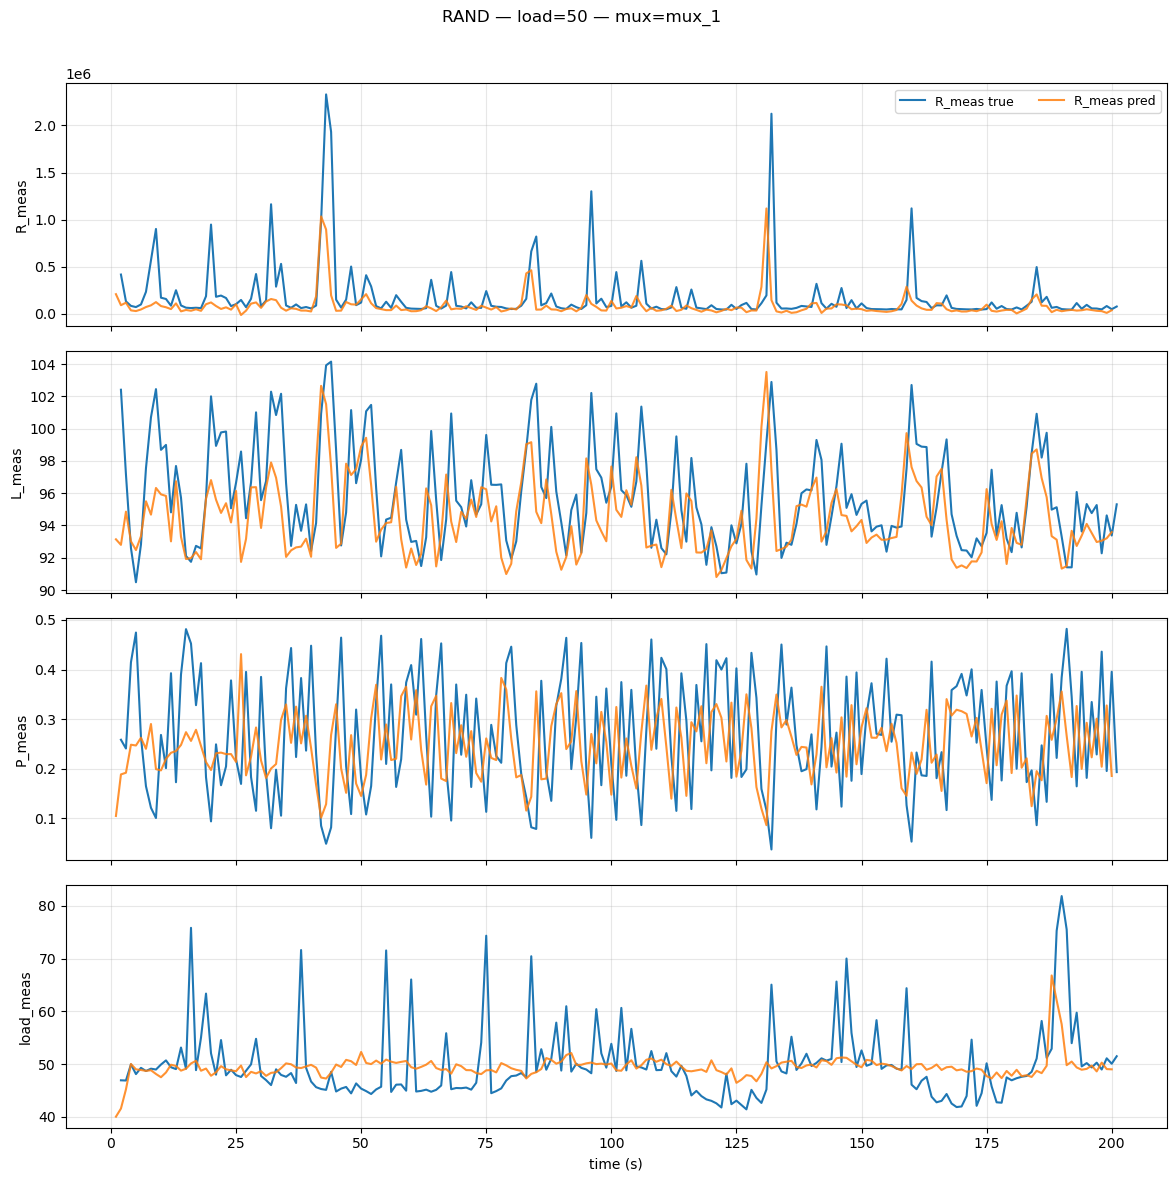

[rand | load=150] RMSE: {'R_meas': 214263.484375, 'L_meas': 0.9819969534873962, 'P_meas': 0.07611388713121414, 'load_meas': 5.935805320739746}


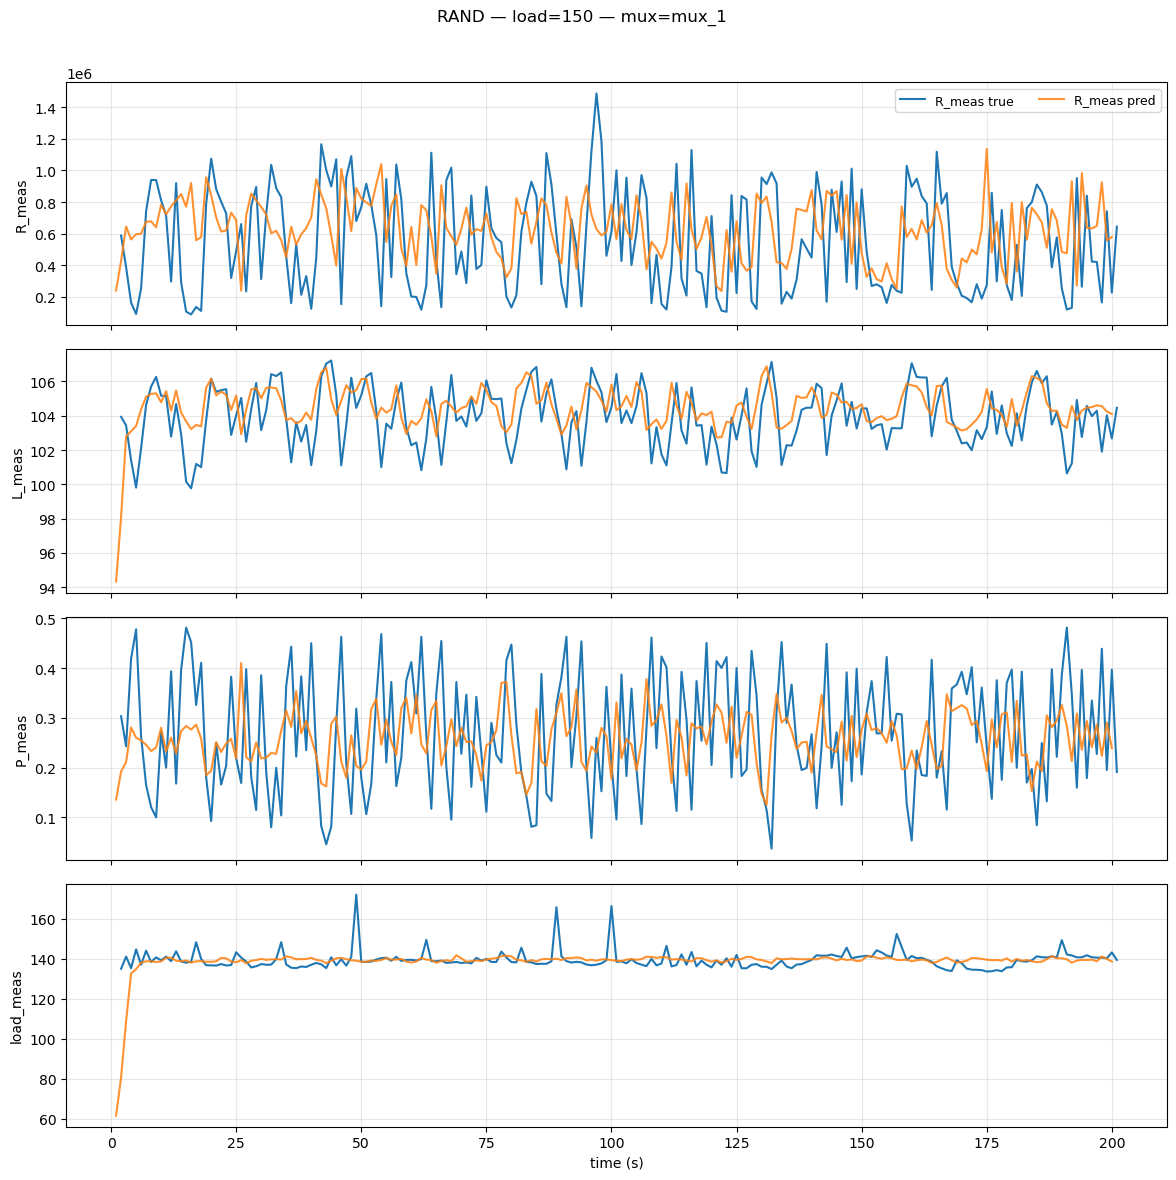

[rand | load=225] RMSE: {'R_meas': 107424.78125, 'L_meas': 0.6322468519210815, 'P_meas': 0.08650285005569458, 'load_meas': 6.481080532073975}


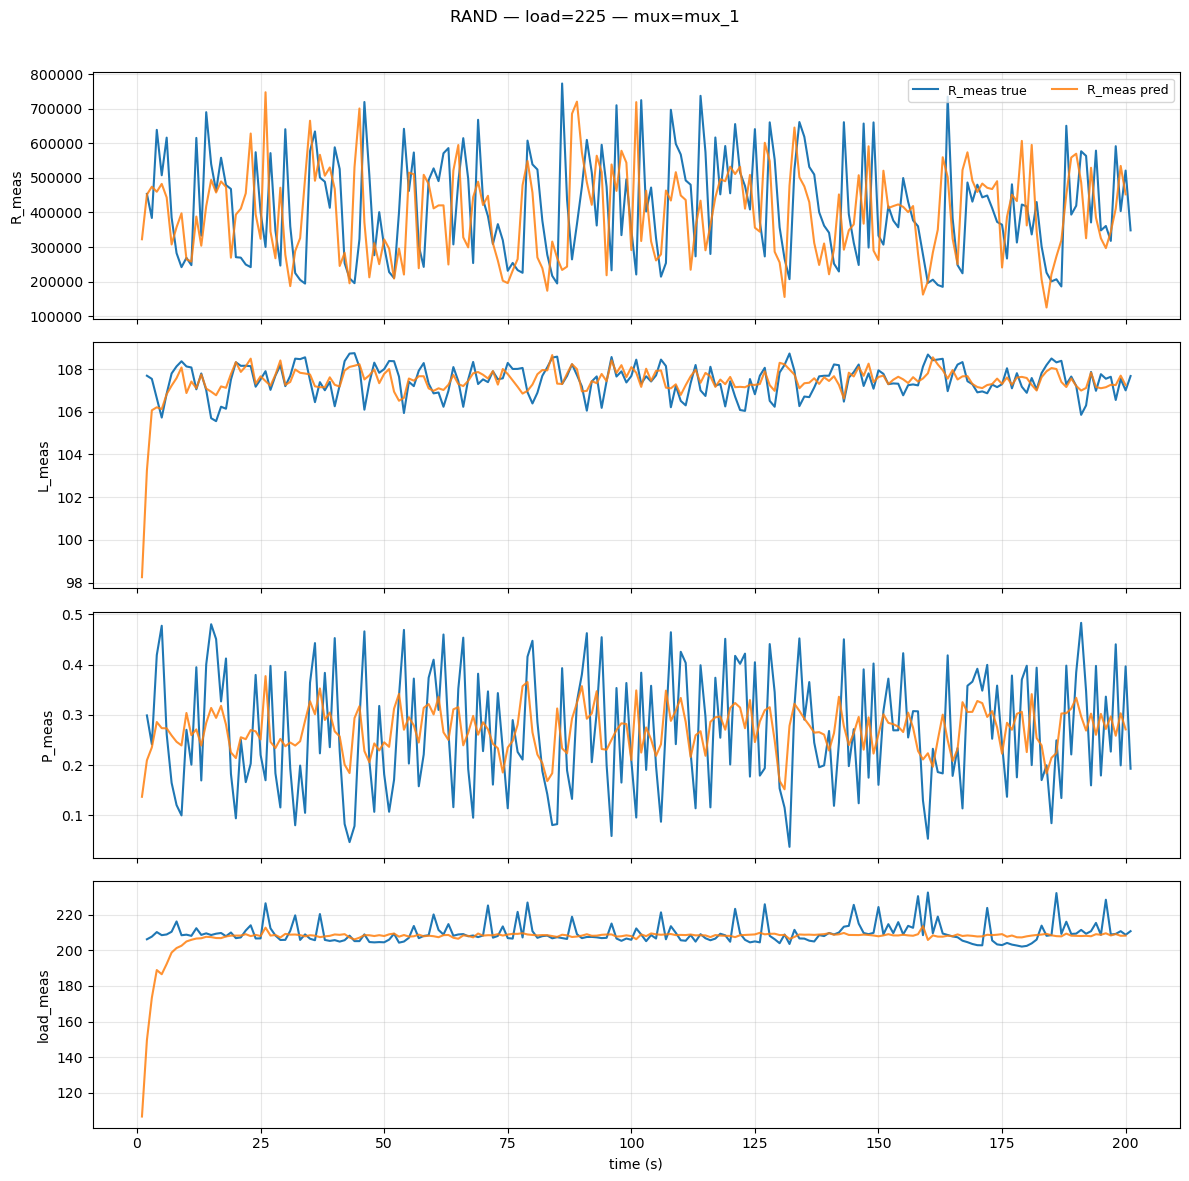


=== RMSE summary ===
{'kind': 'rand', 'load': 50, 'RMSE_R_meas': 64077.23046875, 'RMSE_L_meas': 1.1785764694213867, 'RMSE_P_meas': 0.05805262550711632, 'RMSE_load_meas': 6.450552940368652}
{'kind': 'rand', 'load': 150, 'RMSE_R_meas': 214263.484375, 'RMSE_L_meas': 0.9819969534873962, 'RMSE_P_meas': 0.07611388713121414, 'RMSE_load_meas': 5.935805320739746}
{'kind': 'rand', 'load': 225, 'RMSE_R_meas': 107424.78125, 'RMSE_L_meas': 0.6322468519210815, 'RMSE_P_meas': 0.08650285005569458, 'RMSE_load_meas': 6.481080532073975}


In [14]:
# --- Batch eval multi-loads (plots + RMSE) ---
import os, json, pickle
import numpy as np
import torch, torch.nn as nn
import matplotlib.pyplot as plt

# ===== helpers / fallbacks =====
def tolerant_load_key(ds, load):
    if load in ds: return load
    for k in ds:
        if str(load) in str(k): return k
    raise KeyError(f"charge {load} introuvable; clés dispo: {list(ds)[:5]} ...")

class MinMax1D:
    def __init__(self): self.min=None; self.max=None; self.eps=1e-8
    def fit(self, arr): self.min=float(np.min(arr)); self.max=float(np.max(arr))
    def transform(self, arr): return (arr - self.min) / (self.max - self.min + self.eps)
    def inverse(self, arr):   return arr * (self.max - self.min + self.eps) + self.min

class LSTMForecaster(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout, output_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers,
                            batch_first=True, dropout=(dropout if num_layers>1 else 0.0))
        self.head = nn.Linear(hidden_size, output_size)
    def forward(self, x): h,_ = self.lstm(x); return self.head(h)

@torch.no_grad()
def predict_known_inputs(_model, x_seq, _scalers, device=None):
    if device is None:
        device = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")
    x_norm = np.empty_like(x_seq, dtype=np.float32)
    x_norm[:,0] = _scalers['x0'].transform(x_seq[:,0])
    x_norm[:,1] = _scalers['x1'].transform(x_seq[:,1])
    y_hat = _model(torch.from_numpy(x_norm[None,...]).to(device)).cpu().numpy()[0]
    y_den = np.empty_like(y_hat)
    y_den[:,0] = _scalers['y0'].inverse(y_hat[:,0])
    y_den[:,1] = _scalers['y1'].inverse(y_hat[:,1])
    y_den[:,2] = _scalers['y2'].inverse(y_hat[:,2])
    y_den[:,3] = _scalers['y3'].inverse(y_hat[:,3])
    return y_den

# ===== device =====
DEVICE = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")

# ===== ensure DATASETS =====
if "DATASETS" not in globals():
    DATASETS = {}
    if 'PAM3_RandomInputData' in globals(): DATASETS['rand'] = PAM3_RandomInputData
    if 'PAM3_SineInputData'   in globals(): DATASETS['sine'] = PAM3_SineInputData
    assert DATASETS, "Aucun DATASETS. Exécute la cellule d'import TXT (créant PAM3_*)."

# ===== ensure model/scalers (reload if absent) =====
if "model" not in globals() or "scalers" not in globals():
    save_dir = "./artifacts_lstm"
    with open(os.path.join(save_dir,"config.json"), "r") as f: cfgd = json.load(f)
    model = LSTMForecaster(cfgd["input_size"], cfgd["hidden_size"], cfgd["num_layers"],
                           cfgd["dropout"], cfgd["output_size"]).to(DEVICE)
    try:
        state = torch.load(os.path.join(save_dir,"lstm_pam3.pt"), map_location=DEVICE, weights_only=True)
    except TypeError:
        state = torch.load(os.path.join(save_dir,"lstm_pam3.pt"), map_location=DEVICE)
    model.load_state_dict(state); model.eval()
    with open(os.path.join(save_dir,"scalers.pkl"), "rb") as f: scalers = pickle.load(f)
    mux = cfgd.get("mux","mux_1")
    in_ch  = tuple(cfgd.get("input_channels", ("P_meas","load_meas")))
    out_ch = tuple(cfgd.get("target_channels",("R_meas","L_meas","P_meas","load_meas")))
else:
    # on suppose que CFG existe si tu as tout entraîné dans cette session
    try:
        mux = CFG.mux
        in_ch, out_ch = CFG.input_channels, CFG.target_channels
    except Exception:
        mux = "mux_1"; in_ch=("P_meas","load_meas"); out_ch=("R_meas","L_meas","P_meas","load_meas")

# ===== params batch =====
kinds = [k for k in ("rand","sine") if k in DATASETS]  # testera les deux si présents
# Choisis explicitement, ex.: loads_to_test = [50,150,225]
loads_to_test = [50,150,225]   # None -> auto (toutes les charges triées)
N_plot = 200          # nb d'échantillons à afficher
save_plots = True
plots_dir = "./artifacts_lstm/plots"; os.makedirs(plots_dir, exist_ok=True)

# ===== run =====
results = []   # stocke RMSE par (kind, load)
for kind in kinds:
    keys = list(DATASETS[kind].keys())
    # ordonner par valeur numérique si possible
    try:
        keys_sorted = sorted(keys, key=lambda k: int(str(k).rstrip('Nn')))
    except Exception:
        keys_sorted = sorted(keys, key=lambda k: str(k))
    chosen_loads = loads_to_test or keys_sorted

    for L in chosen_loads:
        lk = tolerant_load_key(DATASETS[kind], L)
        rec = DATASETS[kind][lk]; md = rec["multiplex_data"][mux]
        x_raw = np.stack([md[in_ch[0]], md[in_ch[1]]], axis=-1).astype(np.float32)
        y_raw = np.stack([md[nm] for nm in out_ch], axis=-1).astype(np.float32)
        t_raw = rec["time_step"]

        # predict + align
        y_hat  = predict_known_inputs(model, x_raw, scalers, device=DEVICE)
        y_true = y_raw[1:]; y_pred = y_hat[:-1]
        t_true = t_raw[1:]; t_pred = t_raw[:-1]
        rmse = np.sqrt(((y_pred - y_true)**2).mean(axis=0))

        results.append({"kind": kind, "load": int(str(lk).rstrip('Nn')) if str(lk).rstrip('Nn').isdigit() else lk,
                        **{f"RMSE_{nm}": float(r) for nm, r in zip(out_ch, rmse)}})
        print(f"[{kind} | load={lk}] RMSE:", {nm: float(r) for nm, r in zip(out_ch, rmse)})

        # plot per-load
        fig, axs = plt.subplots(len(out_ch), 1, figsize=(12, 2.0*len(out_ch)+4), sharex=True)
        if len(out_ch)==1: axs=[axs]
        for i, nm in enumerate(out_ch):
            axs[i].plot(t_true[:N_plot], y_true[:N_plot, i], label=f"{nm} true")
            axs[i].plot(t_pred[:N_plot], y_pred[:N_plot, i], label=f"{nm} pred", alpha=0.85)
            axs[i].set_ylabel(nm); axs[i].grid(True, alpha=0.3)
        axs[-1].set_xlabel("time (s)")
        axs[0].legend(ncol=min(4,len(out_ch)), fontsize=9, loc="upper right")
        fig.suptitle(f"{kind.upper()} — load={lk} — mux={mux}")
        plt.tight_layout(rect=[0,0,1,0.97])
        if save_plots:
            out_png = os.path.join(plots_dir, f"pred_{kind}_{lk}.png")
            plt.savefig(out_png, dpi=140)
        plt.show()

# ===== résumé RMSE trié =====
def sort_key(d):
    return (d["kind"], d["load"] if isinstance(d["load"], (int,float)) else 1e9)

results_sorted = sorted(results, key=sort_key)
print("\n=== RMSE summary ===")
for row in results_sorted:
    print(row)
